In [ ]:
import pickle
from sklearn.datasets import load_diabetes
ld=load_diabetes()
x=ld.data
y=ld.target
from sklearn.preprocessing import StandardScaler  #normalize x
from keras.callbacks import EarlyStopping
#es=EarlyStopping(monitor='accuracy',patience=3, mode='auto',min_delta=0.001)    #accuracy
es=EarlyStopping(monitor='val_loss',patience=3, mode='min',min_delta=0.001)     # validation loss
ss=StandardScaler()
x1=ss.fit_transform(x)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,test_size=0.2)
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=10))  #hidden layer1
model.add(Dense(32,activation='relu'))      # hidden layer
model.add(Dense(5,activation='relu'))       # hidden layer
model.add(Dense(1,activation='relu'))      # output layer
model.compile(optimizer='adam',loss='mean_squared_error')
# model fitting
#model.fit(xtrain,ytrain,epochs=500)

In [ ]:
#model.fit(xtrain,ytrain,epochs=1000,callbacks=[es])
hs=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=1000,callbacks=[es])

In [ ]:
hs.history.keys()

dict_keys(['loss', 'val_loss'])

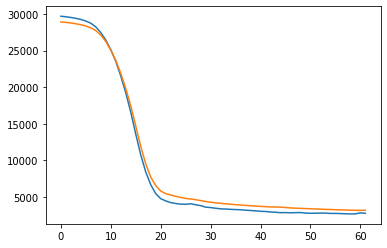

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hs.history['val_loss'])
plt.plot(hs.history['loss'])